# 가위바위보 분류하기

## 이미지데이터를 이용해 가위바위보를 분류하는 모델을 만들어보자

1. 이미지 데이터 만들기
    - Google Teachable 머신을 이용해 이미지 데이터를 획득
    - 각각의 데이터를 차원을 제외하고 mnist이미지형식과 같게 reshape해준다.

2. reshape된 이미지를 바탕으로 데이터를 나누고 모델을 만든 후


3. 검증해보자.

In [180]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
print(tf.__version__)
print(np.__version__)

2.6.0
1.22.2


In [181]:
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료')

PIL 라이브러리 import 완료


## mnist이미지 데이터와 같은 형식으로 resize해준다.

In [182]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
가위 이미지 resize 완료!


In [183]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1007  images to be resized.
1007  images resized.
바위 이미지 resize 완료!


In [184]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
보 이미지 resize 완료!


## 이미지 데이터로 test 데이터 만들기

In [185]:
import numpy as np

def load_data(img_path, number_of_data=3023):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3023 입니다.
x_train shape: (3023, 28, 28, 3)
y_train shape: (3023,)


라벨 0


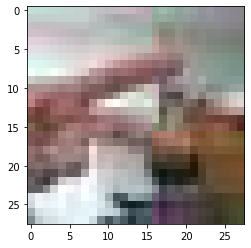

In [186]:
plt.imshow(x_train[300])
print('라벨', y_train[300])

## 머신러닝 모델 만들기

In [230]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 128)             

## 학습

In [232]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs =5)

Epoch 1/5
95/95 [==============================] - 4s 39ms/step - loss: 0.1700 - accuracy: 0.9454
Epoch 2/5
95/95 [==============================] - 4s 40ms/step - loss: 0.0250 - accuracy: 0.9937
Epoch 3/5
95/95 [==============================] - 4s 39ms/step - loss: 0.0821 - accuracy: 0.9825
Epoch 4/5
95/95 [==============================] - 4s 39ms/step - loss: 0.0391 - accuracy: 0.9897
Epoch 5/5
95/95 [==============================] - 4s 40ms/step - loss: 0.0015 - accuracy: 0.9997


## aifel에 미리 준비되어있던 test data resize

In [233]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [234]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!


In [235]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
보 이미지 resize 완료!


라벨 1


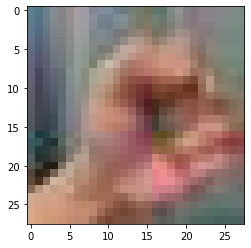

In [236]:
plt.imshow(x_test[150])
print('라벨', y_test[150])

## test데이터 만들기

In [240]:
def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/test/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("검증데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

검증데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


## accuracy 도출해보기

In [241]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 81.7778 - accuracy: 0.3333
test_loss: 81.77777099609375
test_accuracy: 0.3333333432674408


## 이것저것 건드려보자

- 드롭아웃을 모델에 추가하지 않았을 때
```
test_loss: 3.1781930923461914
test_accuracy: 0.4233333468437195
```

- 드롭아웃을 0.2 주었을 때
```
test_loss: 3.08599853515625
test_accuracy: 0.38999998569488525
```

- 드롭아웃을 0.3 주었을 때
```
test_loss: 1.200281023979187
test_accuracy: 0.43666666746139526
```

- 최고로 학습률이 올랐을 때 

```python

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d_24 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                25632     
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 99         

실행 완료
10/10 - 0s - loss: 3.2504 - accuracy: 0.4700
test_loss: 3.2504403591156006
test_accuracy: 0.4699999988079071

```                  

- 배치정규화 코드를 넣어보기도 하고, Dense층의 뉴런 개수를 변경해보기도 하고
- 러닝레이트를 추가해보기도 했지만.. 0.46이 최대값이였다..

```
학습데이터의 양이 부족한것 같고

전체 더미에서 학습데이터, 테스트 데이터를 나누어 써보라는 조언을 받은 후에

학습데이터를 총 3천개로 늘리고 (기존900개)

전체더미에서 검증데이터와 실험데이터를 나눠서 써보기로함
```

## 이미지 불러오기와 resize는 이전과 똑같다.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
print(tf.__version__)
print(np.__version__)
from PIL import Image
import glob
import os

print('PIL 라이브러리 import 완료')

2.6.0
1.22.2
PIL 라이브러리 import 완료


In [2]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
가위 이미지 resize 완료!


In [3]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1007  images to be resized.
1007  images resized.
바위 이미지 resize 완료!


In [4]:
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1008  images to be resized.
1008  images resized.
보 이미지 resize 완료!


## 데이터셋 다시 만들기

- 이전엔 학습데이터와 검증데이터가 완전히 분리된 모델이였다.

- 이번엔 전체 데이터셋에서 학습데이터와 검증데이터를 나눠보기로했다.

In [5]:
import numpy as np
import os
import glob
from PIL import Image

def load_data(img_path, number_of_data=3023, validation_ratio=0.1):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size = 28
    color = 3
    imgs = np.zeros(number_of_data * img_size * img_size * color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx += 1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx += 1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx, :, :, :] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx += 1

    # 데이터를 섞기
    indices = np.arange(number_of_data)
    np.random.shuffle(indices)
    imgs = imgs[indices]
    labels = labels[indices]

    # 검증 데이터 개수를 계산하고, 나머지를 학습 데이터로 사용
    num_validation = int(number_of_data * validation_ratio)
    x_train = imgs[num_validation:]
    y_train = labels[num_validation:]
    x_test = imgs[:num_validation]
    y_test = labels[:num_validation]

    print("전체 데이터 개수:", number_of_data)
    print("학습 데이터 개수:", len(x_train))
    print("검증 데이터 개수:", len(x_test))

    return x_train, y_train, x_test, y_test

# 가위바위보 이미지가 저장된 디렉토리 경로를 설정합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"

# 3023개의 이미지를 학습 데이터와 검증 데이터로 나눔
x_train, y_train, x_test, y_test = load_data(image_dir_path, number_of_data=3023, validation_ratio=0.1)

# 이미지 데이터 shape 출력
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

전체 데이터 개수: 3023
학습 데이터 개수: 2721
검증 데이터 개수: 302
x_train shape: (2721, 28, 28, 3)
y_train shape: (2721,)
x_test shape: (302, 28, 28, 3)
y_test shape: (302,)


## 각 데이터들의 이미지를 인덱스로 출력해보기

라벨: 2


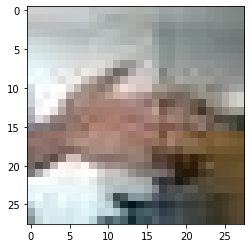

In [6]:
plt.imshow(x_test[1])
print('라벨:', y_test[1])
plt.show()

#정규화를 안해서 검정색으로 나오기도 했다..
#train데이터 이미지,라벨 확인

라벨 2


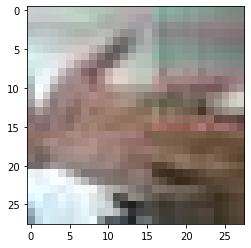

In [7]:
plt.imshow(x_test[150])
print('라벨', y_test[150])

## 학습하고 검증해보자.

### 맨 처음의 데이터

- test_loss: 4.621364593505859
- test_accuracy: 0.6092715263366699

- 아무런 파라미터도 건들이지 않고 진행하였을 때 0.6이라는 값을 얻을 수 있었다.

### 러닝레이트를 설정해보자.

- test_loss: 1.5711181049482548e-06
- test_accuracy: 1.0

- 러닝레이트를 0.001로 설정을 하니 정확도가 1.0이 나와 오버피팅 되어버렸다.

### 드롭아웃 추가

- 아래 코드는 드롭아웃값을 추가하고 에폭을 5로 변경해주었다


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
import numpy as np
from tensorflow.keras.layers import BatchNormalization

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

In [9]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs =5)

Epoch 1/5
86/86 [==============================] - 4s 39ms/step - loss: 0.0919 - accuracy: 0.9691
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.0278 - accuracy: 0.9919
Epoch 3/5
86/86 [==============================] - 3s 38ms/step - loss: 0.0060 - accuracy: 0.9993
Epoch 4/5
86/86 [==============================] - 3s 38ms/step - loss: 0.0033 - accuracy: 0.9996
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.0043 - accuracy: 0.9989


In [10]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.2562 - accuracy: 0.8841
test_loss: 0.256230890750885
test_accuracy: 0.8841059803962708


- 획득한 값 중 오버피팅을 제외하고 가장 높은 값이 나왔다!

- 조금 더 건들여보자

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [12]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs =5)

Epoch 1/5
86/86 [==============================] - 4s 39ms/step - loss: 0.0763 - accuracy: 0.9750
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.0067 - accuracy: 0.9974
Epoch 3/5
86/86 [==============================] - 3s 39ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 4/5
86/86 [==============================] - 3s 41ms/step - loss: 9.1227e-04 - accuracy: 1.0000
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 2.7077e-04 - accuracy: 1.0000


In [13]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 5.1881e-05 - accuracy: 1.0000
test_loss: 5.188088471186347e-05
test_accuracy: 1.0


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [18]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs =10)

Epoch 1/10
86/86 [==============================] - 4s 38ms/step - loss: 0.2059 - accuracy: 0.9320
Epoch 2/10
86/86 [==============================] - 3s 38ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 3/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0348 - accuracy: 0.9908
Epoch 4/10
86/86 [==============================] - 3s 37ms/step - loss: 0.0466 - accuracy: 0.9923
Epoch 5/10
86/86 [==============================] - 3s 38ms/step - loss: 0.0120 - accuracy: 0.9971
Epoch 6/10
86/86 [==============================] - 3s 37ms/step - loss: 0.0391 - accuracy: 0.9912
Epoch 7/10
86/86 [==============================] - 3s 37ms/step - loss: 0.0244 - accuracy: 0.9930
Epoch 8/10
86/86 [==============================] - 3s 39ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 9/10
86/86 [==============================] - 3s 38ms/step - loss: 0.0122 - accuracy: 0.9967
Epoch 10/10
86/86 [==============================] - 3s 38ms/step - loss: 0.0844 - accuracy: 0.9890


In [19]:
test_loss, test_accuracy = model.evaluate(x_test,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

10/10 - 0s - loss: 0.0177 - accuracy: 0.9934
test_loss: 0.017674751579761505
test_accuracy: 0.9933775067329407


## 0.99

- 맨 처음의 모델과 달라진 점은

    1.컨볼루션 층을 한 층 더 늘렸다.

    2.Flatten 후 배치정규화코드를 삽입했다.
    
    3.dense 층의 뉴런수를 256, 128로 조정했다.
    
    4.dropout 값을 0.3 추가했다.
    
    5.러닝레이트 값을 0.01로 추가했다.

# 결론

1. 이미지 분류기 모델이 성공적으로 만들어졌는가?	
    - 그래프 시각화를 하지 못했다 (데이터셋을 다시 만드는 과정에서 시간이 많이 소비됨)


2. 오버피팅을 극복하기 위한 적절한 시도가 있었는가?	
    - 정규화와 드롭아웃 등등 파라미터를 넣어보앗다.
3. 분류모델의 test accuracy가 기준 이상 높게 나왔는가?	85% 이상 도달하였음

    - 네

# 회고

- 어렵다.... 어려워도 너무 어렵다 ! 책 내용을 따라갈때에는 할 만하다고 생각했다.

- 직접 코드를 수정하고 추가하고 만들어 보려니... 머리가 백지가 됐다.

- test 데이터와 train 데이터를 나누고, 검증하는 과정자체를 내가 완벽하게 이해하지 못하고 있었다. 내 지식이 부족해서 그런지는 모르겠지만,, 학습데이터는 내가 만든 데이터, 검증 데이터는 다른 사람의 데이터였을 때 검증정확도를 올리는 부분에서 너무 막혔다... 캐글필사를 할 때 EDA 뿐 만 아니라 학습시키는 부분도 집중해서 필사를 해봐야겠다.
